In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

def get_auto_mpg():
    
    '''Acquire, clean, and return the auto-mpg dataset'''
    
    df = pd.read_fwf('auto-mpg.data', header=None)
    
    df.columns = ['mpg', 'cylinders', 'displ', 'horsepower', 'weight', 'acc',
              'model_year', 'origin', 'name']
    
    df = df[df['horsepower'] != '?']
    
    df['horsepower'] = df['horsepower'].astype('float')
    
    return df

def train_val_test(df, target=None, stratify=None, seed=42):
    
    '''Split data into train, validate, and test subsets with 60/20/20 ratio'''
    
    train, val_test = train_test_split(df, train_size=0.6, random_state=seed)
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed)
    
    return train, val, test


In [6]:
df = get_auto_mpg()

In [7]:
train, val, test = train_val_test(df)

In [8]:
train.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
212,16.5,8,350.0,180.0,4380.0,12.1,76,1,"""cadillac seville"""
346,32.3,4,97.0,67.0,2065.0,17.8,81,3,"""subaru"""
325,44.3,4,90.0,48.0,2085.0,21.7,80,2,"""vw rabbit c (diesel)"""
90,12.0,8,429.0,198.0,4952.0,11.5,73,1,"""mercury marquis brougham"""
246,32.8,4,78.0,52.0,1985.0,19.4,78,3,"""mazda glc deluxe"""


In [9]:
cont_var = ['mpg','displ','horsepower','weight','acc']

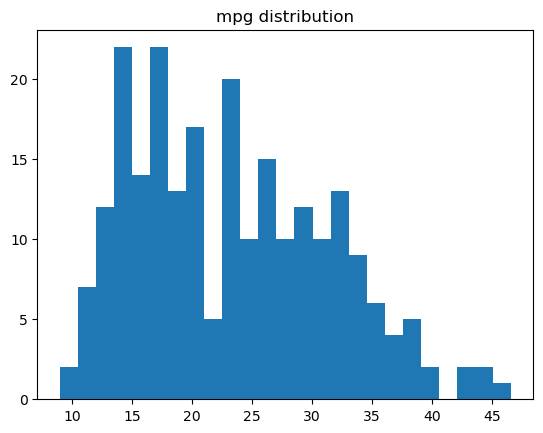

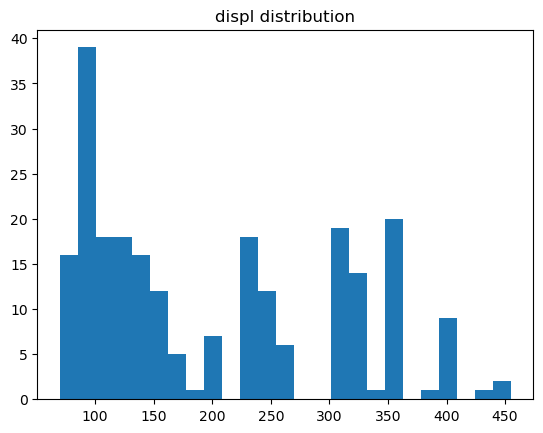

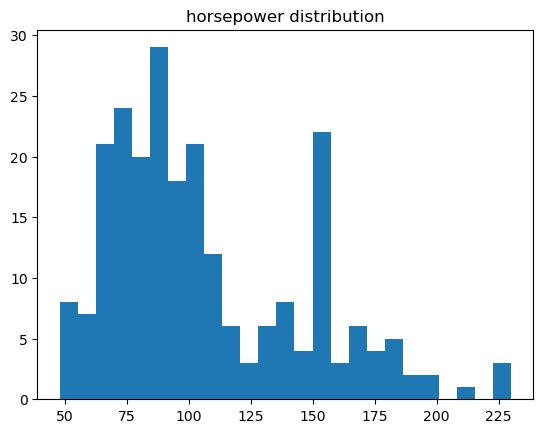

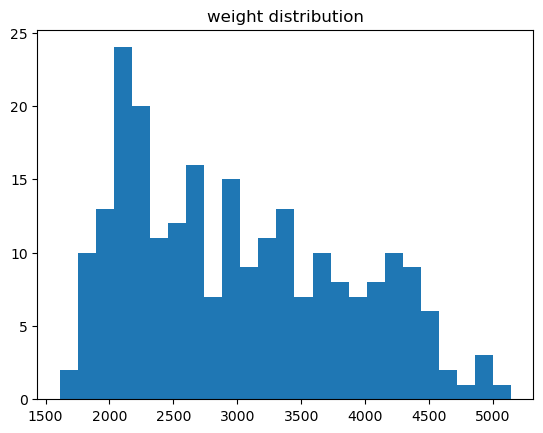

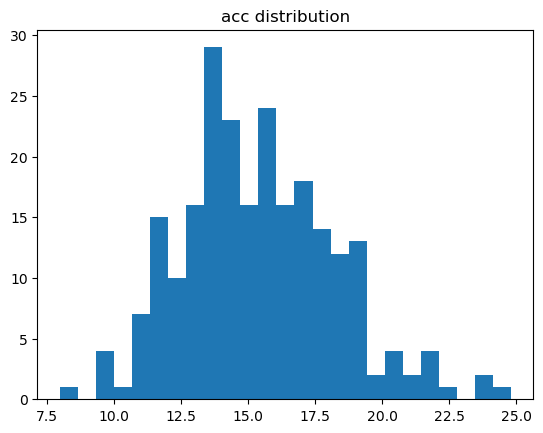

In [35]:
for col in cont_var:
    plt.hist(train[col],bins = 25)
    plt.title(f'{col} distribution')
    plt.show()

In [36]:
train['name'].nunique()

200

In [37]:
train['model_year'].nunique(), train['origin'].nunique()

(13, 3)

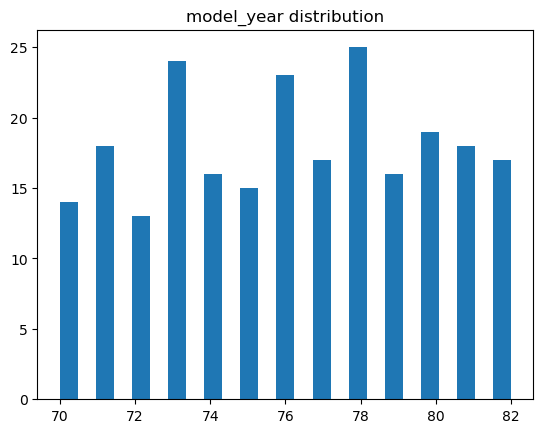

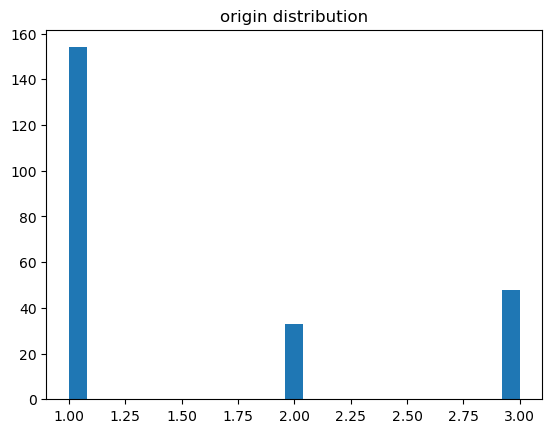

In [38]:
for col in ['model_year', 'origin']:
    plt.hist(train[col], bins = 25)
    plt.title(f'{col} distribution')
    plt.show()

model year is uniform distribution from years 1970 - 1982
the origin distro is skewed, with many cars coming from origin 1. 

In [39]:
df_corr = train[cont_var].corr(method = 'spearman')

<AxesSubplot:>

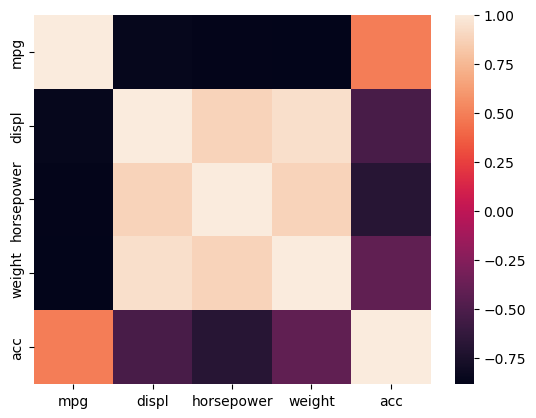

In [40]:
sns.heatmap(df_corr)

displacement , horsepower, and weight all show a strong negative corre with mpg

acc and ampg have a moderate corre

there is a stgrong positive corre between displacement, horsepower, and weight.

there is a moderate negative corre between acc and displacement, horsepower, and weight

important to compare the spearmanr results between displacement, horsepower, and weight and mpg to see which feat has the best corre with the target variable

<AxesSubplot:xlabel='origin', ylabel='mpg'>

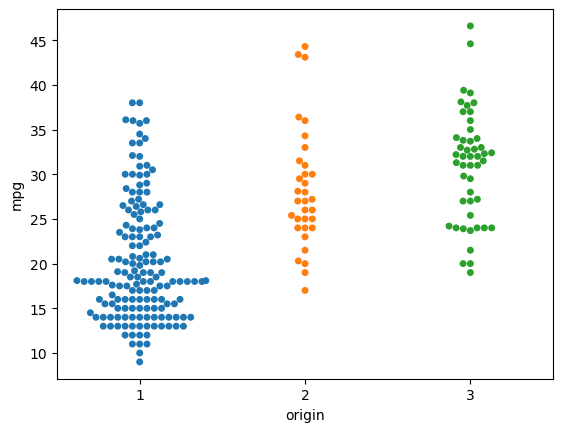

In [41]:
sns.swarmplot(x = 'origin', y = 'mpg', data = train)

one sample t-test is reccommended 

In [45]:
t, p = stats.ttest_1samp(train[train['origin'] == 1]['mpg'],
                  train['mpg'].mean())

In [46]:
alpha = 0.05

if t < 0 and p/2 < alpha:
    print ('reject null hypothesis')
else:
    print ('fail to reject null hypothesis')

reject null hypothesis
